# In this notebook I will solve the loan prediction problem. The idea is to automate who gets the loan and who does not.

In [47]:
import numpy as np
import pandas as pd
import decimal
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn import tree

In [2]:
trainSet = pd.read_csv('./train_Loan.csv') #loading the training set
testSet = pd.read_csv('./test_Loan.csv') # loading the test set

In [3]:
trainSet.head(5) #take a quick look at the training set

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0,NaN,360,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y


In [4]:
testSet.head(5) #take a look at the test set

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110,360,1,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126,360,1,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208,360,1,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100,360,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78,360,1,Urban


In [5]:
trainSet.shape #to see how many rows and columns it have

(614, 13)

In [6]:
testSet.shape

(367, 12)

In [7]:
trainSet.isnull().sum() #to see how many null values are in each column

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
trainSet.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
trainSet[pd.isnull(trainSet).any(axis=1)] #it prints out the rows with null values


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0,NaN,360,1,Urban,Y
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840,109,360,1,Urban,Y
16,LP001034,Male,No,1,Not Graduate,No,3596,0,100,240,NaN,Urban,Y
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500,115,NaN,1,Urban,Y
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917,112,360,0,Rural,N
24,LP001052,Male,Yes,1,Graduate,NaN,3717,2925,151,360,NaN,Semiurban,N
29,LP001087,Female,No,2,Graduate,NaN,3750,2083,120,360,1,Semiurban,Y
30,LP001091,Male,Yes,1,Graduate,NaN,4166,3369,201,360,NaN,Urban,N
35,LP001106,Male,Yes,0,Graduate,No,2275,2067,NaN,360,1,Urban,Y
36,LP001109,Male,Yes,0,Graduate,No,1828,1330,100,NaN,0,Urban,N


In [10]:
trainSet.isnull().values.ravel().sum() #total number of rows with null values

149

In [11]:
trainSet.shape[0]  # total number of rows
trainSet.isnull().values.ravel().sum() / float(trainSet.shape[0]) * 100 # how much data do we lose if I delete
    #rows with NaN values?

24.267100977198698

I will loose 24% of data! This is significant! I can do something else too. I can only remove the null values from rows that have binary values such as credit history. For continuous values I can replace the null values with the average values obtained. 

Another thing that I could do is to use algorithms to predict the NaN values. This of course takes much longer and I don't have time for that at this point. Maybe later! I would do it for more important projects and I think it is a good idea.

In [12]:
trainSet.dropna(subset = ['Gender','Married','Education','Self_Employed','Credit_History','Dependents'] , inplace = True)

In [13]:
trainSet.isnull().values.ravel().sum()

31

In [14]:
trainSet['Loan_Amount_Term'].unique()

array([ 360.,  120.,   nan,  180.,   60.,  300.,  480.,  240.,   36.,   84.])

Now for ApplicantIncome ,CoapplicantIncome , LoanAmount and Loan_Amount_Term I can replace them with mean values.

In [15]:
print ("Applicant Income Average is ", trainSet['ApplicantIncome'].mean())
print ("CoApplicant Income Average is ", trainSet['CoapplicantIncome'].mean())
print ("Loan amount Average is ", trainSet['LoanAmount'].mean())
print ("Loan Amount Term average is ", trainSet['Loan_Amount_Term'].mean())


('Applicant Income Average is ', 5308.1467710371817)
('CoApplicant Income Average is ', 1561.9978864748336)
('Loan amount Average is ', 144.13617886178861)
('Loan Amount Term average is ', 342.01202404809618)


Now I can replace the null values with the mean values.

In [16]:
trainSet['ApplicantIncome'].fillna(trainSet['ApplicantIncome'].mean(), inplace = True)
trainSet['CoapplicantIncome'].fillna(trainSet['CoapplicantIncome'].mean(), inplace = True)
trainSet['LoanAmount'].fillna(trainSet['LoanAmount'].mean(), inplace = True)
trainSet['Loan_Amount_Term'].fillna(trainSet['Loan_Amount_Term'].mean(), inplace = True)

Now the data set is ready to do some visualization and explore and see what the relationship between some features look like.
My hopythesis is that poeple who have more income will be accepted for the laod. And also, the more income they have, the more likely it is for them to get a higher loan.

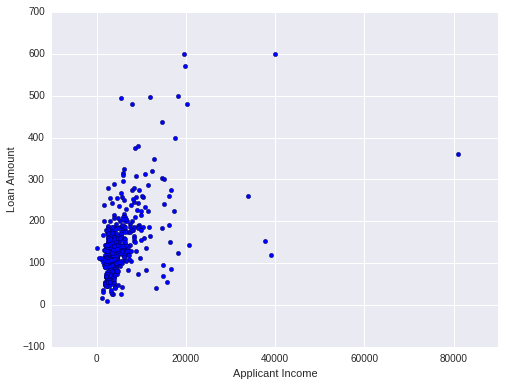

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(trainSet['ApplicantIncome'], trainSet['LoanAmount'])
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')

I want to find the relation between the number of children in a family, income and the amount of loan. Fist I have to make the number of children a category.

In [18]:
trainSet.loc[trainSet['Dependents'] == '0', 'Dependents'] = 0
trainSet.loc[trainSet['Dependents'] == '1', 'Dependents'] = 1 #have only one dependent
trainSet.loc[trainSet['Dependents']== '2' , 'Dependents'] = 2 # have two dependents
trainSet.loc[trainSet['Dependents'] == '3+', 'Dependents'] = 3 #have more than 3 dependents
#trainSet.head(10)

([<matplotlib.axis.XTick at 0x7f959d888ed0>,
 <a list of 4 Text xticklabel objects>)

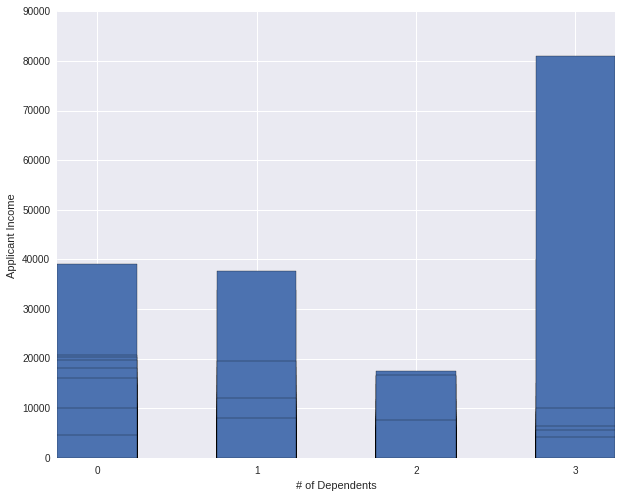

In [19]:
plt.figure(figsize=(10,8))
plt.bar(trainSet['Dependents'], trainSet['ApplicantIncome'], 0.5)
plt.xlabel('# of Dependents')
plt.ylabel('Applicant Income')
plt.xticks((0.25,1.25,2.25, 3.25), (0,1,2,3))

I also have to give binary values to the Education column becasuse we cannot input strings to the machine learning algorithms.

In [20]:
trainSet.loc[trainSet['Education'] == 'Graduate' , 'Education']=1
trainSet.loc[trainSet['Education'] == 'Not Graduate' , 'Education'] = 0
trainSet.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,1,No,5849,0,144.136179,360,1,Urban,Y
1,LP001003,Male,Yes,1,1,No,4583,1508,128.000000,360,1,Rural,N
2,LP001005,Male,Yes,0,1,Yes,3000,0,66.000000,360,1,Urban,Y
3,LP001006,Male,Yes,0,0,No,2583,2358,120.000000,360,1,Urban,Y
4,LP001008,Male,No,0,1,No,6000,0,141.000000,360,1,Urban,Y


The same should happen to all the categorical features.

In [21]:
# For Gender , Male = 0, Female = 1
#trainSet['Gender'].unique() # to check the available values in the column
trainSet.loc[trainSet['Gender'] == 'Male', 'Gender'] = 0
trainSet.loc[trainSet['Gender'] == 'Female' , 'Gender'] = 1
trainSet.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,No,0,1,No,5849,0,144.136179,360,1,Urban,Y
1,LP001003,0,Yes,1,1,No,4583,1508,128.000000,360,1,Rural,N
2,LP001005,0,Yes,0,1,Yes,3000,0,66.000000,360,1,Urban,Y
3,LP001006,0,Yes,0,0,No,2583,2358,120.000000,360,1,Urban,Y
4,LP001008,0,No,0,1,No,6000,0,141.000000,360,1,Urban,Y


In [22]:
#For marital status , yes =1 , no = 0
#trainSet['Married'].unique() #to check the values in the column
trainSet.loc[trainSet['Married'] == 'Yes' , 'Married'] = 1
trainSet.loc[trainSet['Married'] == 'No' , 'Married'] = 0
trainSet.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,No,5849,0,144.136179,360,1,Urban,Y
1,LP001003,0,1,1,1,No,4583,1508,128.000000,360,1,Rural,N
2,LP001005,0,1,0,1,Yes,3000,0,66.000000,360,1,Urban,Y
3,LP001006,0,1,0,0,No,2583,2358,120.000000,360,1,Urban,Y
4,LP001008,0,0,0,1,No,6000,0,141.000000,360,1,Urban,Y


In [23]:
#for self-employment , No = 0 , Yes = 1 
#trainSet['Self_Employed'].unique() #to check the values in the column
trainSet.loc[trainSet['Self_Employed'] == 'Yes' , 'Self_Employed'] = 1
trainSet.loc[trainSet['Self_Employed'] == 'No' , 'Self_Employed'] = 0
trainSet.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,0,5849,0,144.136179,360,1,Urban,Y
1,LP001003,0,1,1,1,0,4583,1508,128.000000,360,1,Rural,N
2,LP001005,0,1,0,1,1,3000,0,66.000000,360,1,Urban,Y
3,LP001006,0,1,0,0,0,2583,2358,120.000000,360,1,Urban,Y
4,LP001008,0,0,0,1,0,6000,0,141.000000,360,1,Urban,Y


In [24]:
#For property area Urban = 1 Semiurban  = 2 Rural = 3
#trainSet['Property_Area'].unique() #to check the values in the column
trainSet.loc[trainSet['Property_Area'] == 'Urban' , 'Property_Area'] = 1
trainSet.loc[trainSet['Property_Area'] == 'Semiurban' , 'Property_Area'] = 2
trainSet.loc[trainSet['Property_Area'] == 'Rural' , 'Property_Area'] = 3
trainSet.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,0,5849,0,144.136179,360,1,1,Y
1,LP001003,0,1,1,1,0,4583,1508,128.000000,360,1,3,N
2,LP001005,0,1,0,1,1,3000,0,66.000000,360,1,1,Y
3,LP001006,0,1,0,0,0,2583,2358,120.000000,360,1,1,Y
4,LP001008,0,0,0,1,0,6000,0,141.000000,360,1,1,Y


In [25]:
#For the loan status Y = 1 , N =0 
#trainSet['Loan_Status'].unique() #to check the values in the column
trainSet.loc[trainSet['Loan_Status'] == 'Y', 'Loan_Status'] = 1
trainSet.loc[trainSet['Loan_Status'] == 'N', 'Loan_Status'] = 0
trainSet.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,0,5849,0,144.136179,360,1,1,1
1,LP001003,0,1,1,1,0,4583,1508,128.000000,360,1,3,0
2,LP001005,0,1,0,1,1,3000,0,66.000000,360,1,1,1
3,LP001006,0,1,0,0,0,2583,2358,120.000000,360,1,1,1
4,LP001008,0,0,0,1,0,6000,0,141.000000,360,1,1,1


Now the data set is actually ready for some more visualization. The loan id is not really a useful feature and I will drop it.

In [26]:
trainSet.drop(['Loan_ID'] , axis = 1, inplace = True) #have to use inpplace = True to make it work
trainSet.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,5849,0,144.136179,360,1,1,1
1,0,1,1,1,0,4583,1508,128.000000,360,1,3,0
2,0,1,0,1,1,3000,0,66.000000,360,1,1,1
3,0,1,0,0,0,2583,2358,120.000000,360,1,1,1
4,0,0,0,1,0,6000,0,141.000000,360,1,1,1


In [27]:
trainSet.shape #now we have 511 rows and 12 columns of data

(511, 12)

([<matplotlib.axis.XTick at 0x7f9599198750>,
 <a list of 3 Text xticklabel objects>)

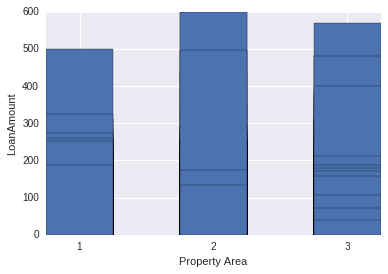

In [28]:
#I want to see if property area and the amount of loan are related. It is not good to have features that
# are related and it can cause overfitting.
plt.Figure(figsize = (10,8))
plt.bar(trainSet['Property_Area'], trainSet['LoanAmount'], 0.5)
plt.xlabel('Property Area')
plt.ylabel('LoanAmount')
plt.xticks((1.25,2.25,3.25), (1,2,3))
# My hopythesis was that urban areas are more expensive and they will get higher loan and
# as we go towards rural areas the loan amount decreases

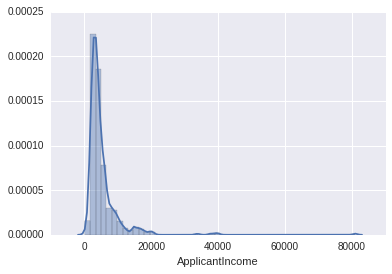

In [29]:
# to see the distribution of the income
sns.distplot(trainSet['ApplicantIncome'])

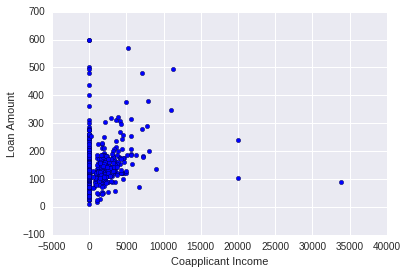

In [30]:
plt.Figure(figsize= (15,10))
plt.scatter(trainSet['CoapplicantIncome'], trainSet['LoanAmount'])
plt.xlabel('Coapplicant Income')
plt.ylabel('Loan Amount')

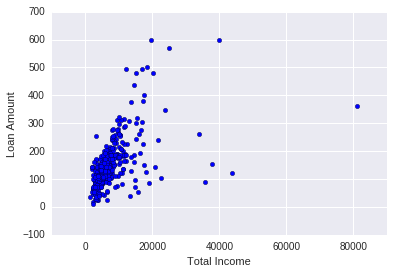

In [31]:
plt.Figure(figsize= (15,10))
plt.scatter(trainSet['CoapplicantIncome']+trainSet['ApplicantIncome'], trainSet['LoanAmount'])
plt.xlabel('Total Income')
plt.ylabel('Loan Amount')

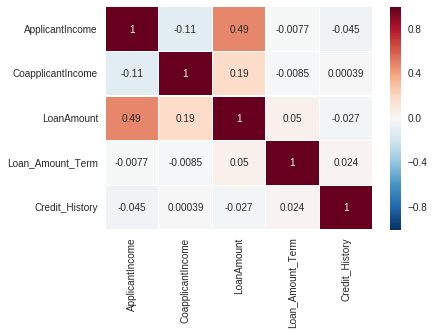

In [32]:
sns.heatmap(trainSet.corr(),annot=True,linewidths=0.2) 
# This shows that as I showed earlier, applicant income and loan amount are related.
#Some how applicant income and coapplicant income are oppositely correlated??!!!


Now it is time to try the machine learning algorithm to train the model.

In [33]:
y = trainSet['Loan_Status']
y=y.astype('int') #the type of y has to be int and not an object otherwise scikitlearn doesn't understand it.
X = trainSet.drop('Loan_Status', axis = 1)
#print X
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#in this case I chose 20% of data to be test set and 80% to be the train set

In [34]:
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(408, 11) (408,)
(103, 11) (103,)


In [35]:
# Trying logistic regression
model = LogisticRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
#print predictions
accuracy = accuracy_score(y_test, predictions)
print round(accuracy*100 ,2)

75.73


I just realized one thing!!!!!!!! I didn't do feature scaling. This is bad. The reason that the prediction looks so crappy is becasue I forget to scale the features. If we want our algorithm to work fine, we have to make sure that the features have similar range. I think the best way to do it is to subtract each value of a certain column by mean and then maybe divide it by standard deviation. Let's see how this works.


The columns that have to be normalized are "ApplicantIncome", "CoapplicantIncome" , "LoanAmount" and "Loan_Amount_Term".

In [36]:
ApplicantIncomeMean = trainSet["ApplicantIncome"].mean()
ApplicantIncomeStd = trainSet["ApplicantIncome"].std()

CoapplicantIncomeMean = trainSet["CoapplicantIncome"].mean()
CoapplicantIncomeStd = trainSet["CoapplicantIncome"].std()

LoanAmountMean = round(trainSet["LoanAmount"].mean(),2)
LoanAmountStd = round(trainSet["LoanAmount"].std(),2)

Loan_Amount_Term_Mean = round(trainSet["Loan_Amount_Term"].mean(),2)
Loan_Amount_Term_Std = round(trainSet["Loan_Amount_Term"].std(),2)

In [37]:
trainSet["ApplicantIncome"] = (trainSet["ApplicantIncome"] - ApplicantIncomeMean) / ApplicantIncomeStd
trainSet["CoapplicantIncome"] = (trainSet["CoapplicantIncome"] - CoapplicantIncomeMean)/CoapplicantIncomeStd
trainSet["LoanAmount"] = (trainSet["LoanAmount"] - LoanAmountMean)/LoanAmountStd
trainSet["Loan_Amount_Term"] = (trainSet["Loan_Amount_Term"] - Loan_Amount_Term_Mean)/Loan_Amount_Term_Std
#print LoanAmountMean, LoanAmountStd
trainSet.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,0.097255,-0.610302,-0.000049,0.280699,1,1,1
1,0,1,1,1,0,-0.130394,-0.021098,-0.206209,0.280699,1,3,0
2,0,1,0,1,1,-0.415044,-0.610302,-0.998339,0.280699,1,1,1
3,0,1,0,0,0,-0.490028,0.311013,-0.308420,0.280699,1,1,1
4,0,0,0,1,0,0.124407,-0.610302,-0.040118,0.280699,1,1,1


I think it is a good idea to keep everything between 0 and 1. So I have to change the "Property_Area" and "Dependents" columns.

In [38]:
trainSet.insert(0,"No_Dependent",0 )
trainSet.insert(1,"One_Dependent" , 0)
trainSet.insert(2,"Two_Dependent",  0 )
#if all of these are 0 then they have more
trainSet.loc[trainSet['Dependents'] == 0, 'No_Dependent'] = 1
trainSet.loc[trainSet['Dependents'] == 1, 'One_Dependent'] = 1
trainSet.loc[trainSet['Dependents'] == 2, 'Two_Dependent'] = 1
trainSet.drop("Dependents", axis = 1, inplace = True)
trainSet.head(5)

,No_Dependent,One_Dependent,Two_Dependent,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,1,0,0.097255,-0.610302,-0.000049,0.280699,1,1,1
1,0,1,0,0,1,1,0,-0.130394,-0.021098,-0.206209,0.280699,1,3,0
2,1,0,0,0,1,1,1,-0.415044,-0.610302,-0.998339,0.280699,1,1,1
3,1,0,0,0,1,0,0,-0.490028,0.311013,-0.308420,0.280699,1,1,1
4,1,0,0,0,0,1,0,0.124407,-0.610302,-0.040118,0.280699,1,1,1


In [39]:
trainSet.insert(13, "Urban", 0)
trainSet.insert(14, "Semiurban",0)
#if both are 0 then it is rural
trainSet.loc[trainSet['Property_Area'] == 1, 'Urban'] = 1
trainSet.loc[trainSet['Property_Area'] == 2, 'Semiurban'] = 1
trainSet.drop("Property_Area", axis = 1, inplace = True)
trainSet.head(5)

,No_Dependent,One_Dependent,Two_Dependent,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Urban,Semiurban,Loan_Status
0,1,0,0,0,0,1,0,0.097255,-0.610302,-0.000049,0.280699,1,1,0,1
1,0,1,0,0,1,1,0,-0.130394,-0.021098,-0.206209,0.280699,1,0,0,0
2,1,0,0,0,1,1,1,-0.415044,-0.610302,-0.998339,0.280699,1,1,0,1
3,1,0,0,0,1,0,0,-0.490028,0.311013,-0.308420,0.280699,1,1,0,1
4,1,0,0,0,0,1,0,0.124407,-0.610302,-0.040118,0.280699,1,1,0,1


OK finally! It sort of look ok now. Even though I am not happy with negative values but let's see what happens.

In [41]:
y = trainSet['Loan_Status']
y=y.astype('int') #the type of y has to be int and not an object otherwise scikitlearn doesn't understand it.
X = trainSet.drop('Loan_Status', axis = 1)
#print X
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#in this case I chose 20% of data to be test set and 80% to be the train set

In [46]:
X.shape, y.shape

((511, 14), (511,))

In [42]:
model = LogisticRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
#print predictions
accuracy = accuracy_score(y_test, predictions)
print round(accuracy*100 ,2)

78.64


OK it still sucks!!!! Maybe I should try a different model?

In [48]:
model = tree.DecisionTreeClassifier()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
#print predictions
accuracy = accuracy_score(y_test, predictions)
print round(accuracy*100 ,2)

68.93


This sucks even more!!!!! I have to think about it

In [50]:
sns.heatmap(confusion_matrix(y,predictions),annot=True,fmt='2.0f')

ValueError: Found input variables with inconsistent numbers of samples: [511, 103]